# Análisis y Visualización de datos

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('datos limpios')

In [18]:
data.head()

,Unnamed: 0,DBO5,DEPURADORA,MONTH,NT,PRUEBA,PT,SS,YEAR,DEPURADORA_2,MONTH_2,DATE
0,0,5.0,VIV,enero,15.8,1.0,0.91,5.0,2017.0,0,1,2017-1-1
1,1,5.0,VIV,enero,14.9,2.0,0.84,4.0,2017.0,0,1,2017-1-2
2,2,5.0,VIV,febrero,9.8,1.0,0.63,3.0,2017.0,0,2,2017-2-1
3,3,5.0,VIV,febrero,7.0,2.0,0.67,3.0,2017.0,0,2,2017-2-2
4,4,5.0,VIV,marzo,9.7,1.0,0.85,4.0,2017.0,0,3,2017-3-1


In [19]:
del(data['Unnamed: 0'])

In [20]:
data.head()

,DBO5,DEPURADORA,MONTH,NT,PRUEBA,PT,SS,YEAR,DEPURADORA_2,MONTH_2,DATE
0,5.0,VIV,enero,15.8,1.0,0.91,5.0,2017.0,0,1,2017-1-1
1,5.0,VIV,enero,14.9,2.0,0.84,4.0,2017.0,0,1,2017-1-2
2,5.0,VIV,febrero,9.8,1.0,0.63,3.0,2017.0,0,2,2017-2-1
3,5.0,VIV,febrero,7.0,2.0,0.67,3.0,2017.0,0,2,2017-2-2
4,5.0,VIV,marzo,9.7,1.0,0.85,4.0,2017.0,0,3,2017-3-1


In [21]:
data.groupby(['DEPURADORA_2'])['NT'].mean()

DEPURADORA_2
0     9.924359
1    10.515871
2    10.003001
3    13.963823
Name: NT, dtype: float64

In [22]:
data.groupby(['DEPURADORA_2'])['PT'].mean()

DEPURADORA_2
0    0.761282
1    0.622013
2    0.547263
3    0.542179
Name: PT, dtype: float64

In [29]:
data.groupby(['DEPURADORA_2'])['SS'].mean()

DEPURADORA_2
0     3.128205
1    11.899359
2     8.232051
3     2.983333
Name: SS, dtype: float64

In [30]:
data.groupby(['DEPURADORA_2'])['DBO5'].mean()

DEPURADORA_2
0    5.311538
1    9.141987
2    6.809615
3    4.614103
Name: DBO5, dtype: float64

In [23]:
data_2=data.drop(columns=['PRUEBA', 'YEAR','DEPURADORA_2', 'MONTH_2'], axis=1) 

In [24]:
data_2.describe()

,DBO5,NT,PT,SS
count,624.000000,624.000000,624.000000,624.000000
mean,7.514103,10.744709,0.610755,8.771635
std,4.614830,4.779340,0.587375,6.482049
min,1.800000,1.300000,0.140000,1.000000
25%,5.000000,8.880000,0.447500,3.400000
50%,6.000000,9.260000,0.575000,8.000000
75%,10.000000,12.019479,0.680000,12.000000
max,38.000000,58.900000,13.000000,55.000000


Se observan distintos pesos de los contaminantes,viendo que en general la mayor concentración es la de N,seguida por SS y en último lugar P (al ser un elemento limitado).Esto se puede comprobar en el gráfico siguiente:

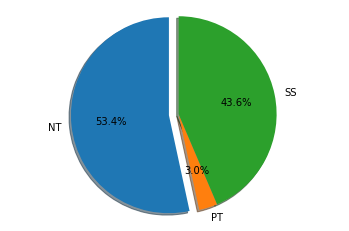

In [25]:
labels = 'NT', 'PT', 'SS'
sizes = [10.744709,0.610755 ,8.771635]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [26]:
datos = data[['DBO5', 'NT', 'PT', 'SS']]
correlation = datos.corr()

In [27]:
correlation 

,DBO5,NT,PT,SS
DBO5,1.000000,-0.039197,0.061663,0.524270
NT,-0.039197,1.000000,-0.044778,0.032537
PT,0.061663,-0.044778,1.000000,0.098366
SS,0.524270,0.032537,0.098366,1.000000


Se observa una correlación importatnte entre el DBO5 y los SS,esto tiene sentido,puesto que cuanto mayor son los sólidos en suspensión,a priori,mayor necesidad BD05.

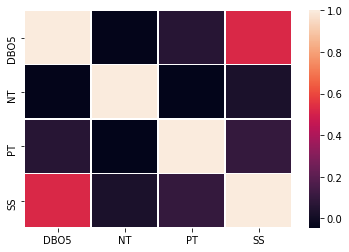

In [28]:
x = sns.heatmap(correlation, linewidths=.5)


In [31]:
data.to_csv('depuradoras')